In [1]:
import numpy as np
import h5py
import pandas
import os
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
def load_data(file_format, resampled, atlas):
    data = []
    hemi = ['L', 'R']
    for h in hemi:
        fpath = file_format.format(hemi=h, resampled=resampled)
        with h5py.File(fpath, 'r') as f:
                # Load the pairwise ISCs
                dat = f['pw_ISC'][:]
                dat_mask = np.tril(np.ones_like(dat),-1)
                data.append(dat[np.nonzero(dat_mask)].reshape((dat.shape[0],-1)))
    data = np.concatenate(data,axis=0)
    return data

In [3]:
root = "/home/ali/graham-akhanf/EpLink/Eplink"
atlases = ['Glasser_2016', 'Desikan', 'Schaefer2018_17Networks_400', 'Yan2023_17Networks_400']
datasets = ["eplink-p2", "eplink-p3"]
task_dataset = {'eplink-p2': 'hitchcock', 'eplink-p3': 'movie'}

fwhm = 0
confounds_idx = 1

file_pattern = "ISC-pipeline/results/{dataset}/pwISC/pwISC_task-{task}_hemi-{{hemi}}_fwhm-{fwhm}_confounds-{confounds_idx}_resampled-{{resampled}}_atlas-{atlas}.h5"

KstestResult(statistic=0.11049723756906077, pvalue=0.02400134060058043, statistic_location=0.2177345492050224, statistic_sign=1)
KstestResult(statistic=0.125, pvalue=0.6306885744220877, statistic_location=0.09887902686078205, statistic_sign=1)
KstestResult(statistic=0.05223880597014925, pvalue=0.6436241644841604, statistic_location=0.09626174084882526, statistic_sign=1)
KstestResult(statistic=0.03865336658354115, pvalue=0.5872072625719476, statistic_location=0.0916467949966345, statistic_sign=1)


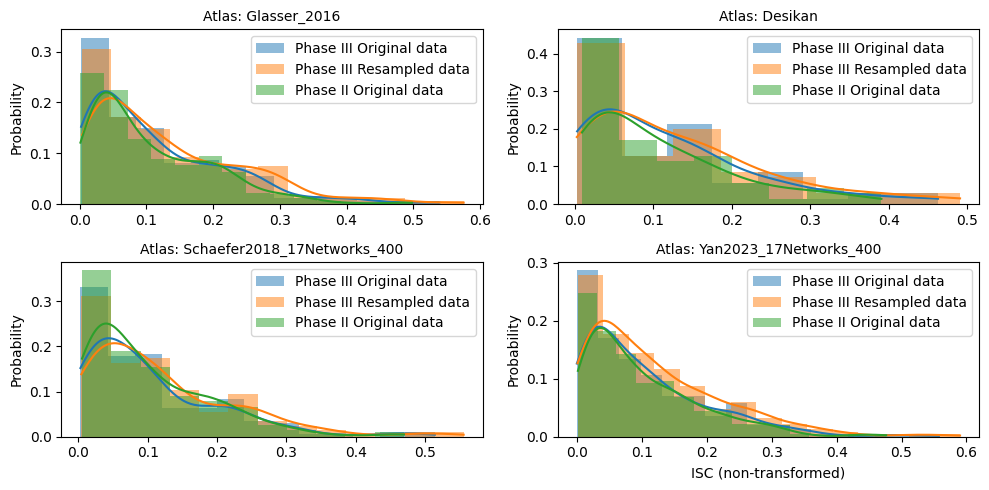

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.reshape((-1,))

for i, atlas in enumerate(atlases):
    
    task = task_dataset[datasets[0]]
    file_format = os.path.join(root, file_pattern.format(dataset=datasets[0], task=task, fwhm=fwhm, confounds_idx=confounds_idx, atlas=atlas))
    p2_org = load_data(file_format, 'N', atlas)

    task = task_dataset[datasets[1]]
    file_format = os.path.join(root, file_pattern.format(dataset=datasets[1], task=task, fwhm=fwhm, confounds_idx=confounds_idx, atlas=atlas))
    p3_org = load_data(file_format, 'N', atlas)
    p3_resampled = load_data(file_format, 'Y', atlas)


    # Create the histograms
    # sns.histplot(data_org.reshape((-1,)), alpha=0.5, label='Original data', ec='None', kde=True, ax=axes[i])
    # sns.histplot(data_resampled.reshape((-1,)), alpha=0.5, label='Resampled data', ec='None', kde=True, ax=axes[i])

    sns.histplot(p3_org.mean(axis=1), alpha=0.5, label='Phase III Original data', ec='None', stat='probability', kde=True, ax=axes[i])
    sns.histplot(p3_resampled.mean(axis=1), alpha=0.5, label='Phase III Resampled data', ec='None', stat='probability', kde=True, ax=axes[i])
    sns.histplot(p2_org.mean(axis=1), alpha=0.5, label='Phase II Original data', ec='None', stat='probability', kde=True, ax=axes[i])

    # Add labels and title
    plt.xlabel('ISC (non-transformed)')
    axes[i].set_title(f'Atlas: {atlas}', fontdict={'fontsize': 10})

    # Add legend
    axes[i].legend()

    print(ks_2samp(p2_org.mean(axis=1), p3_resampled.mean(axis=1)))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# KS test within ROI


In [ ]:
# Correlation of ISC patterns across rois between phases

(362, 561)
(72, 561)
(402, 561)


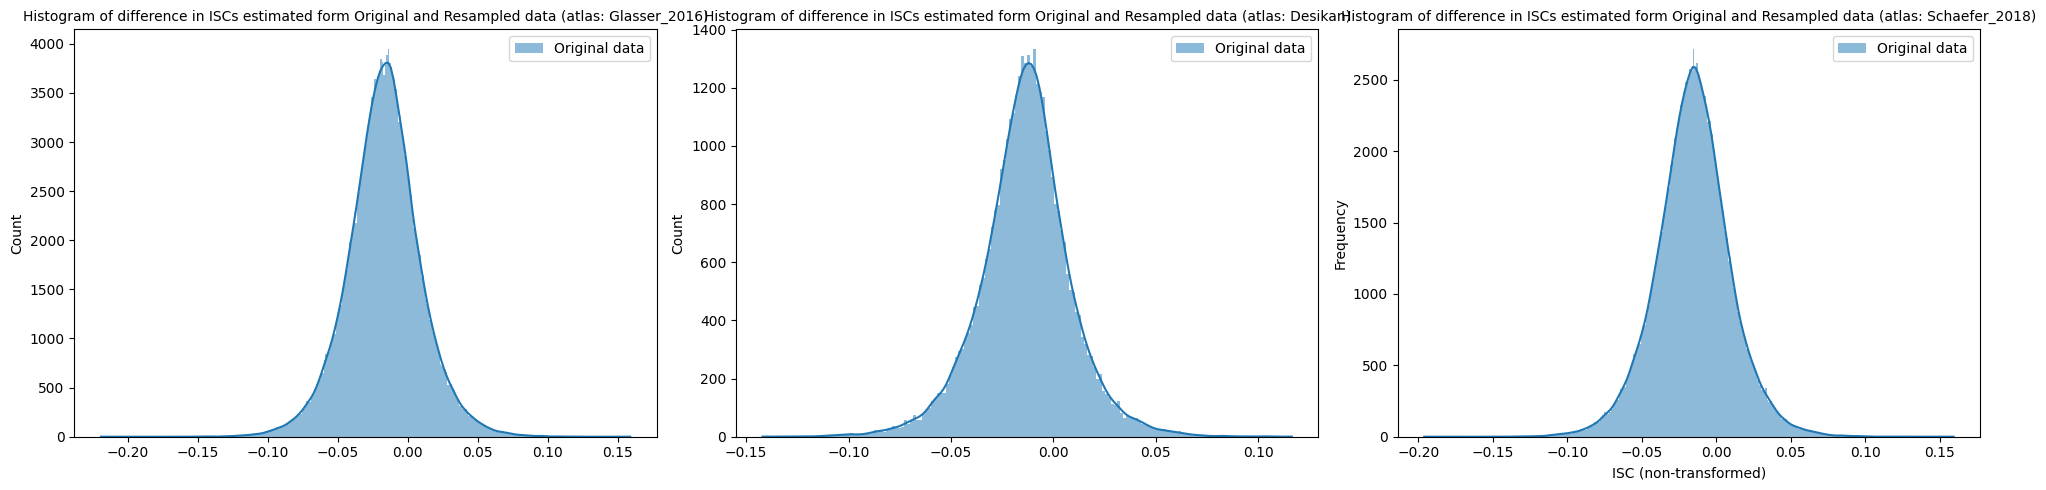

In [4]:
atlases = ['Glasser_2016', 'Desikan', 'Schaefer_2018']
task = "movie"
confounds_idx = 1

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, atlas in enumerate(atlases):
    file_format = f"ISC-pipeline/results/pwISC/pwISC_task-{task}_hemi-{{hemi}}_confounds-{confounds_idx}_resampled-{{resampled}}_atlas-{atlas}.h5"
    data_org = load_data(file_format, 'N', atlas)
    data_resampled = load_data(file_format, 'Y', atlas)

    diff = data_org - data_resampled

    # Create the histograms
    sns.histplot(diff.reshape((-1,)), alpha=0.5, label='Original data', ec='None', kde=True, ax=axes[i])

    # sns.histplot(diff.mean(axis=1), alpha=0.5, label='Original - Resampled', ec='None', kde=True, ax=axes[i])

    # Add labels and title
    plt.xlabel('ISC (non-transformed)')
    plt.ylabel('Frequency')
    axes[i].set_title(f'Histogram of difference in ISCs estimated form Original and Resampled data (atlas: {atlas})', fontdict={'fontsize': 10})

    # Add legend
    axes[i].legend()

    #print(ks_2samp(data_org.mean(axis=1), data_resampled.mean(axis=1)))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# compare diff dist. w/ null dist.

In [ ]:
# compare w/ phase II

In [21]:
root = "/home/ali/graham-akhanf/EpLink/Eplink"
atlases = ['Glasser_2016', 'Desikan', 'Schaefer2018_17Networks_400', 'Yan2023_17Networks_400']
datasets = ["eplink-p2", "eplink-p3"]
task_dataset = {'eplink-p2': 'hitchcock', 'eplink-p3': 'movie'}

fwhm = 0
confounds_idx = 1

file_pattern = "ISC-pipeline/results/{dataset}/looISC/control/looISC_task-{task}_hemi-{{hemi}}_fwhm-{fwhm}_confounds-{confounds_idx}_resampled-{{resampled}}_atlas-{atlas}.h5"

In [22]:
def load_data_loo(file_format, resampled, atlas):
    data = []
    hemi = ['L', 'R']
    for h in hemi:
        fpath = file_format.format(hemi=h, resampled=resampled)
        with h5py.File(fpath, 'r') as f:
                # Load the pairwise ISCs
                dat = f['loo_ISC'][:]
                data.append(dat)
    data = np.concatenate(data,axis=1)
    return data

Glasser_2016
KstestResult(statistic=0.08011049723756906, pvalue=0.1958812012919802, statistic_location=0.24746323427315617, statistic_sign=1)
KstestResult(statistic=0.0856353591160221, pvalue=0.14065275657907575, statistic_location=0.4727905270606418, statistic_sign=1)
Desikan
KstestResult(statistic=0.1111111111111111, pvalue=0.7695469627551301, statistic_location=0.0921771687339831, statistic_sign=1)
KstestResult(statistic=0.1111111111111111, pvalue=0.7695469627551301, statistic_location=0.37371969806723876, statistic_sign=1)
Schaefer2018_17Networks_400
KstestResult(statistic=0.04975124378109453, pvalue=0.7029856557928998, statistic_location=0.30110326319851743, statistic_sign=1)
KstestResult(statistic=0.03233830845771144, pvalue=0.9847692740224824, statistic_location=0.27562948926391045, statistic_sign=1)
Yan2023_17Networks_400
KstestResult(statistic=0.043640897755610975, pvalue=0.42996550975574055, statistic_location=0.25395015473774946, statistic_sign=1)
KstestResult(statistic=0.02

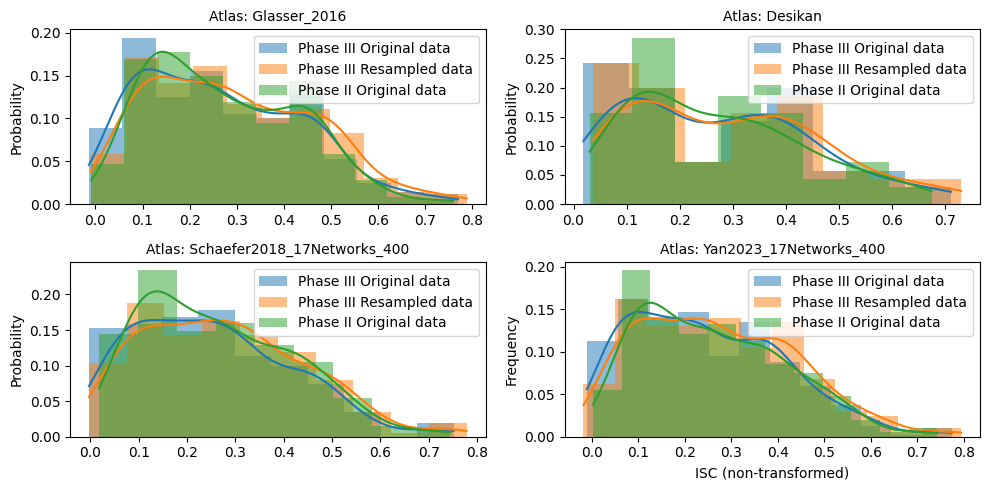

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.reshape((-1,))

for i, atlas in enumerate(atlases):
    task = task_dataset[datasets[0]]
    file_format = os.path.join(root, file_pattern.format(dataset=datasets[0], task=task, fwhm=fwhm, confounds_idx=confounds_idx, atlas=atlas))
    p2_org = load_data_loo(file_format, 'N', atlas)

    task = task_dataset[datasets[1]]
    file_format = os.path.join(root, file_pattern.format(dataset=datasets[1], task=task, fwhm=fwhm, confounds_idx=confounds_idx, atlas=atlas))
    p3_org = load_data_loo(file_format, 'N', atlas)
    p3_resampled = load_data_loo(file_format, 'Y', atlas)

    # Create the histograms
    sns.histplot(p3_org.mean(axis=0), alpha=0.5, label='Phase III Original data', ec='None', stat='probability', kde=True, ax=axes[i])
    sns.histplot(p3_resampled.mean(axis=0), alpha=0.5, label='Phase III Resampled data', ec='None', stat='probability', kde=True, ax=axes[i])
    sns.histplot(p2_org.mean(axis=0), alpha=0.5, label='Phase II Original data', ec='None', stat='probability', kde=True, ax=axes[i])


    # Add labels and title
    plt.xlabel('ISC (non-transformed)')
    plt.ylabel('Frequency')
    axes[i].set_title(f'Atlas: {atlas}', fontdict={'fontsize': 10})

    # Add legend
    axes[i].legend()

    print(atlas)
    print(ks_2samp(p3_org.mean(axis=0), p3_resampled.mean(axis=0)))
    print(ks_2samp(p2_org.mean(axis=0), p3_resampled.mean(axis=0)))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Look at COV of ISCs across ROIs and Atlases

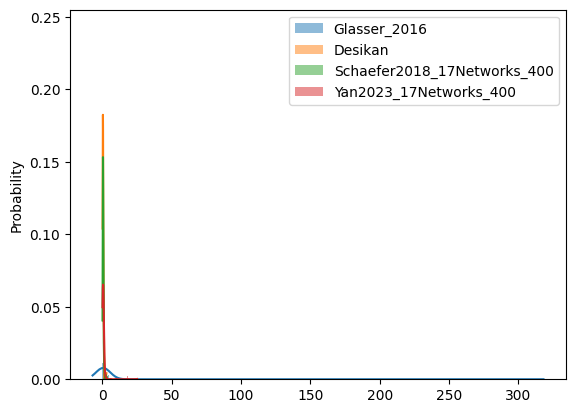

In [52]:
# TODO: overlap of the rois with small COV
# TODO: distribution of COVs for atlases
for i, atlas in enumerate(atlases):
    
    task = task_dataset[datasets[0]]
    file_format = os.path.join(root, file_pattern.format(dataset=datasets[0], task=task, fwhm=fwhm, confounds_idx=confounds_idx, atlas=atlas))
    p2_org = load_data_loo(file_format, 'N', atlas)

    # Load labels
    atlas_path = f'./ISC-pipeline/resources/atlases_fsLR_32K/{atlas}.32k.{{hemi}}.label.gii'
    labels = nib.load(atlas_path.format(hemi='L')).labeltable.get_labels_as_dict()
    labels_R = nib.load(atlas_path.format(hemi='R')).labeltable.get_labels_as_dict()
    n_rois = len(labels)
    for i in range(n_rois):
        labels[i+n_rois] = labels_R[i]

    CoV = np.std(p2_org,axis=0)/np.mean(p2_org,axis=0)
    # CoV[np.isnan(CoV)] = np.Inf 

    # i = np.argmin(np.abs(CoV))
    # print(CoV[i])
    # sns.histplot(p2_org[:,i], label=atlas, ec='None', stat='probability', kde=True)
    sns.histplot(CoV, label=atlas, ec='None', stat='probability', kde=True)

plt.legend()
# plt.xlim([-10, 50])

In [ ]:
# Patients vs controls

In [ ]:
# TODO: Combining the two phases

In [ ]:
# KS test among parcellations

In [ ]:
# vertex level

In [ ]:
# compare parcellations (compare patient and control group LOO ISC)

In [5]:
## TESTS
# Load the GIFTI file by nibabel
gii = nib.load('/home/ali/Workspace/EpLink/Eplink/sub-5093_task-hitchcock_run-1_hemi-R_space-fsLR_den-32k_desc-denoised_fwhm-0_confounds-1_bold.func.gii')
# Return data dimensions
n_rois = gii.darrays[0].data.shape[0]
n_vol = len(gii.darrays)

In [4]:
with h5py.File('/home/ali/Workspace/EpLink/Eplink/sub-5103_task-hitchcock_run-1_hemi-L_confounds-2_bold.func.h5', 'r') as f:
    # Load the parcellated data
    data = f['parcellated_data'][:]
    # Return data dimensions
    n_rois, n_vol = data.shape